# Lecture 4 Assignment
### Shawn Jurgen Mayol

---

# Kruskal's Algorithm

- Kruskal's algorithm: a greedy approach for finding the minimum spanning tree (MST) of a connected, undirected graph.
- Algorithm iteratively adds smallest weighted edge not forming a cycle until all vertices are connected.
- Efficient and guarantees to find the minimum spanning tree for any connected, weighted graph.

A -- I == 5
A -- C == 10
C -- E == 15
B -- C == 20
C -- D == 30
E -- F == 35
E -- G == 45


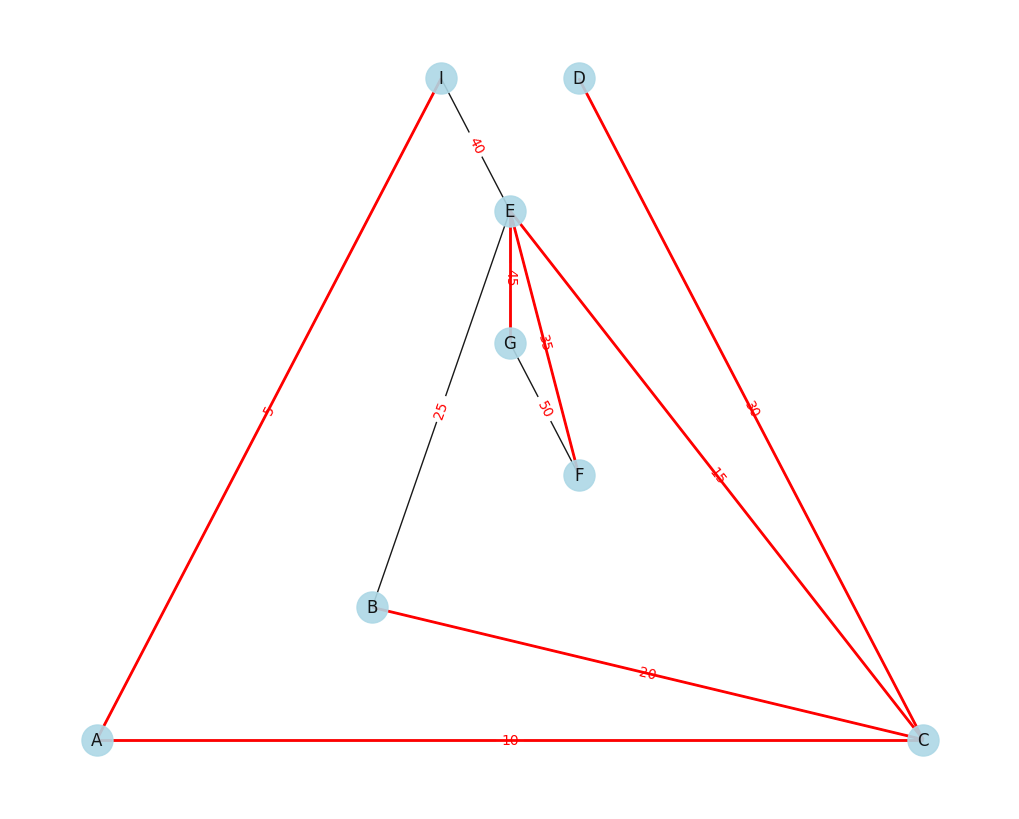

In [16]:
import matplotlib.pyplot as plt
import networkx as nx

# Initialize the graph
G = nx.Graph()
G.add_nodes_from(["A","B","C","D","E","F","G"])
edgelist = [
    ("A","C",10), ("A","I",5), ("C","B",20), ("C","E",15),
    ("C","D",30), ("B","E",25), ("I","E",40), ("E","F",35),
    ("F","G",50), ("G","E",45)
]
G.add_weighted_edges_from(edgelist)

# Function to find the root of a node in disjoint set
def find(parent, i):
    if parent[i] == i:
        return i
    return find(parent, parent[i])

# Function to do union of two subsets
def union(parent, rank, x, y):
    xroot = find(parent, x)
    yroot = find(parent, y)

    if rank[xroot] < rank[yroot]:
        parent[xroot] = yroot
    elif rank[xroot] > rank[yroot]:
        parent[yroot] = xroot
    else:
        parent[yroot] = xroot
        rank[xroot] += 1

# Kruskal's algorithm to find MST
def kruskal(G):
    result = []  # Store the resultant MST
    i = 0       # Index variable, used for sorted edges
    e = 0       # Index variable, used for result[]

    # Step 1: Sort all the edges in non-decreasing order of their weight
    edges = sorted(G.edges(data=True), key=lambda t: t[2]['weight'])

    parent = {}
    rank = {}

    # Create V subsets with single elements
    for node in G.nodes():
        parent[node] = node
        rank[node] = 0

    # Number of edges to be taken is equal to V-1
    while e < len(G.nodes()) - 1:
        # Step 2: Pick the smallest edge and increment the index for next iteration
        u, v, w = edges[i]
        i = i + 1
        x = find(parent, u)
        y = find(parent, v)

        # If including this edge does not cause cycle, include it in result
        # and increment the index of result for next edge
        if x != y:
            e = e + 1
            result.append((u, v, w['weight']))
            union(parent, rank, x, y)

    # Print the contents of result[] to display the built MST
    for u, v, weight in result:
        print(f"{u} -- {v} == {weight}")
    return result

# Run Kruskal's algorithm
mst_edges = kruskal(G)

# Draw the graph with the MST highlighted
pos = nx.planar_layout(G)
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', alpha=0.9)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)}, font_color='red')

# Highlight the edges in the MST
mst_edge_list = [(u, v) for u, v, w in mst_edges]
nx.draw_networkx_edges(G, pos, edgelist=mst_edge_list, width=2, edge_color='red')

plt.show()


# Prim's Algorithm

- Prim's algorithm: another greedy method to find the minimum spanning tree (MST) of a connected, undirected graph.
- Algorithm starts with an arbitrary vertex, gradually adding the closest vertex not already in the tree.
- Efficient and ensures to find the minimum spanning tree for any connected, weighted graph.

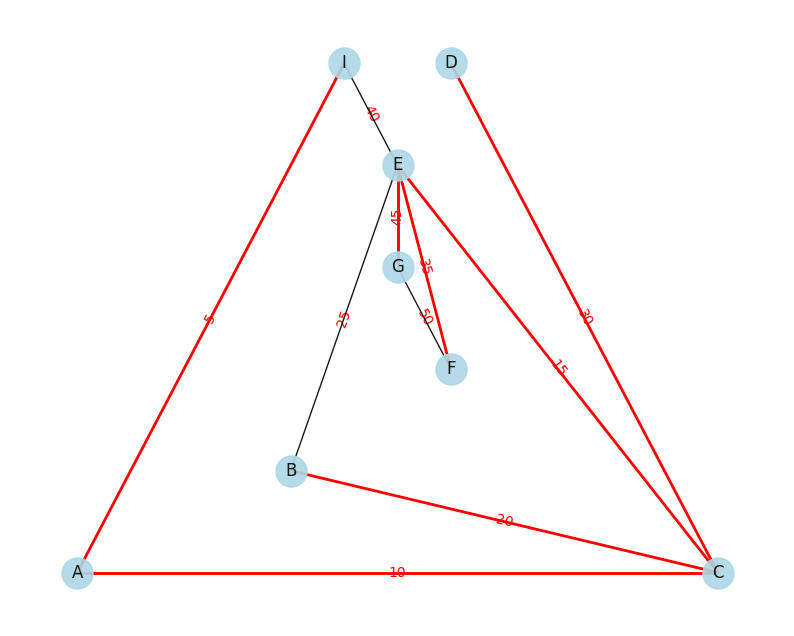

In [17]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a graph
G = nx.Graph()
plt.figure(figsize=(10, 8))

# Add nodes
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G"])

# Add edges with weights
edgelist = [
    ("A", "C", 10), ("A", "I", 5), ("C", "B", 20), ("C", "E", 15),
    ("C", "D", 30), ("B", "E", 25), ("I", "E", 40), ("E", "F", 35),
    ("F", "G", 50), ("G", "E", 45)
]
G.add_weighted_edges_from(edgelist)

# Define layout
pos = nx.planar_layout(G)

# Draw edges with labels
edge_labels = {("A", "C"): 10, ("A", "I"): 5, ("C", "B"): 20, ("C", "E"): 15, ("C", "D"): 30,
               ("B", "E"): 25, ("I", "E"): 40, ("E", "F"): 35, ("F", "G"): 50, ("G", "E"): 45}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

# Draw the original graph
nx.draw(G, pos, edge_color='black', width=1, linewidths=1,
        node_size=500, node_color='lightblue', alpha=0.9, with_labels=True)

# Find the minimum spanning tree using Prim's algorithm
mst = nx.minimum_spanning_tree(G, algorithm='prim')

# Draw the MST
nx.draw_networkx_edges(mst, pos, edge_color='red', width=2)

plt.show()


# Dijkstra's Shortest Path Algorithm

- Dijkstra's algorithm: a method to find the shortest path from a single source vertex to all other vertices in a weighted graph.
- Shortest path: The path with the minimum total edge weight from the source vertex to each destination vertex.
- Algorithm initializes distances to all vertices as infinity, then relaxes edges to update distances until all vertices are reached.
- Efficient and guarantees to find the shortest path for any weighted graph with non-negative edge weights.

To node G: A -> C -> E -> G (length 70)


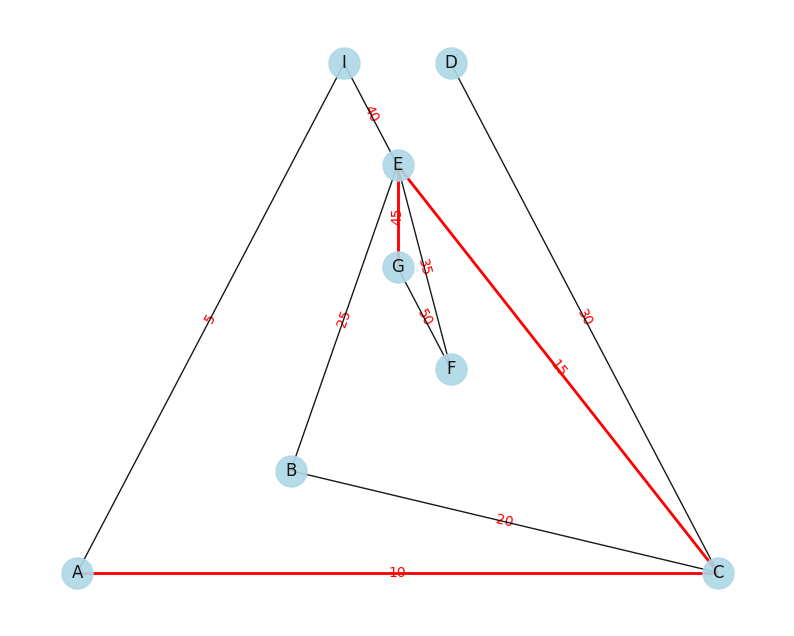

In [20]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a graph
G = nx.Graph()
plt.figure(figsize=(10, 8))

# Add nodes
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G"])

# Add edges with weights
edgelist = [("A", "C", 10), ("A", "I", 5), ("C", "B", 20), ("C", "E", 15), ("C", "D", 30), ("B", "E", 25), ("I", "E", 40), ("E", "F", 35), ("F", "G", 50), ("G", "E", 45)]
G.add_weighted_edges_from(edgelist)

# Define layout
pos = nx.planar_layout(G)  # Seed for reproducible layout

# Draw edges with labels
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels={("A", "C"): 10, ("A", "I"): 5, ("C", "B"): 20, ("C", "E"): 15, ("C", "D"): 30, ("B", "E"): 25, ("I", "E"): 40, ("E", "F"): 35, ("F", "G"): 50, ("G", "E"): 45},
    font_color='red'
)

# Draw the original graph
nx.draw(
    G, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='lightblue', alpha=0.9,
    with_labels=True
)

# Find the shortest paths using Dijkstra's algorithm from node A
shortest_paths = nx.single_source_dijkstra_path(G, source="A", weight="weight")

# Highlight the shortest path to node G by coloring the corresponding edges in green
shortest_path_to_G = shortest_paths["G"]
for i in range(len(shortest_path_to_G) - 1):
    nx.draw_networkx_edges(G, pos, edgelist=[(shortest_path_to_G[i], shortest_path_to_G[i+1])], edge_color='red', width=2)

# Print the shortest path to node G
print(f"To node G: {' -> '.join(shortest_path_to_G)} (length {nx.shortest_path_length(G, source='A', target='G', weight='weight')})")

plt.show()
